In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'medium',
          'figure.figsize': (8, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium',
         'lines.markersize': 20,
          'lines.linewidth': 3
         }

pylab.rcParams.update(params)

In [2]:
X_SCALE = 100

In [3]:
def get_y(x):
    xn = x/X_SCALE
    return np.cos(xn) + (np.sin(xn*10)*0.3)

In [4]:
def get_direction(error, px, cx):
    x_dir = (((cx-px) > 0)-0.5)*2
    error_dir = -((error > 0)-0.5)*2
    gradient_dir = x_dir * error_dir
    return gradient_dir * X_SCALE

def get_error(cy, py):
    return cy-py

In [5]:
def set_title(epoch, direction, error, lr):
    title_str = 'epoch: %d\nDirection : %.2f, dError : %.2f, lr : %.5f' %(epoch, direction, error, lr)
    plt.title(title_str)

In [6]:
N = 100
x = np.linspace(0, np.pi*2, N) * X_SCALE
y = get_y(x)
p = np.random.randint(0, x.shape[0]-1)

cx = x[p]
cy = y[p]

global global_n
global_n = 0

In [7]:
# 국소 최적해 문제를 해결하기 위한 방안: rmsprop, Adagrad 등의 알고리즘

In [8]:
# 3차 실험(학습룰을 바꾸면서 테스트)
learning_rate = 0.5
# learning_rate = 3.0

current_direction = (np.random.rand() - 0.5) * 100

nx = cx + current_direction
ny = get_y(nx)

<Figure size 800x500 with 0 Axes>

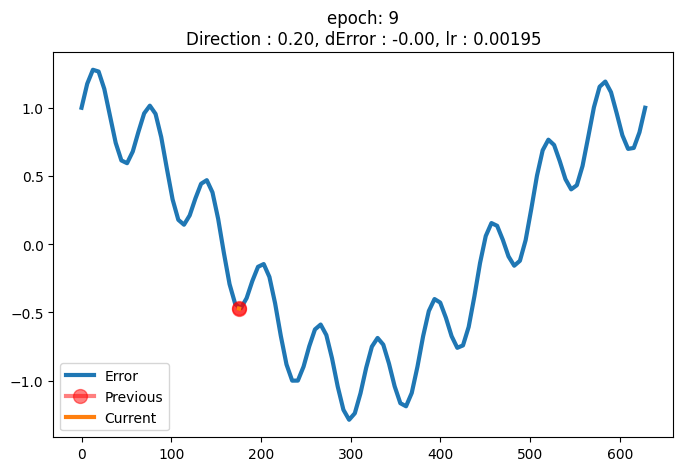

error: [-0.10669669299206341, -0.7914523997115489, 0.08041433677257781, -0.08697146632640895, -0.010684995831749922, 0.00498422374564228, -0.003389813426516508, -0.001019591813069598]
lr: [0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125]


In [9]:
from IPython import display

error=[]
lr=[] # 추가
for i in range(20):
    px, py = cx, cy # previous
    cx, cy = nx, ny # current
    d_error = get_error(cy, py)

    # 3차 실험(학습룰 조절)
    if d_error<1.0:
        learning_rate = (learning_rate * 0.5)
        if learning_rate < 1e-3:
            break
    error.append(d_error)
    lr.append(learning_rate) # 추가

    current_direction = get_direction(d_error, px, cx) * learning_rate

    nx = cx + current_direction
    ny = get_y(nx)

    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.plot(x,y)
    plt.plot([px,cx], [py,cy], 'r.-', alpha=0.5)
    plt.plot([cx,nx], [cy,ny])
    set_title((i+2), current_direction, d_error, learning_rate)
    plt.legend(['Error', 'Previous', 'Current', 'Next'])
    plt.show(block=False)
    plt.pause(0.5)

print('error:', error)
print('lr:', lr)
